In [1]:
import pandas as pd
import numpy as np

In [2]:
data =pd.read_csv("Car details v3.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
data.shape

(8128, 13)

In [4]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
from pandas_profiling import ProfileReport

In [6]:
data.profile_report()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
# remove the unneccesary name column from dataset
data.drop(["name","torque"],axis=1,inplace=True)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


## Handling categorical variables (Part 1)

### 1. Lable Encoding

One of the simplest and most common solutions advertised to transform categorical variables is Label Encoding. __It consists of substituting each group with a corresponding number and keeping such numbering consistent throughout the feature__.This solution makes the models run, and it is one of the most commonly used by aspiring Data Scientists. However, its simplicity comes with many issues.
Numbers hold relationships. 
Well, that’s not exactly right…
This is especially an issue for algorithms, such as K-Means, where a distance measure is calculated when running the model.

### 2. One-Hot Encoding

__One-Hot Encoding__ is the most common, correct way to deal with __non-ordinal categorical data__. It consists of creating an additional feature for each group of the categorical feature and mark each observation belonging (__Value=1__) or not (__Value=0__) to that group.This approach is able to encode categorical features properly, despite some minor drawbacks. Specifically, the presence of a high number of binary values is not ideal for distance-based algorithms, such as Clustering models. In addition, __the high number of additionally generated features introduces the curse of dimensionality.__ This means that due to the now high dimensionality of the dataset, the dataset becomes much more sparse. In other words, in Machine Learning problems, you’d need at least a few samples per each feature combination. Increasing the number of features means that we might encounter cases of not having enough observations for each feature combination.

### 3. Target Encoding

A lesser known, but very effective way of handling categorical variables, is __Target Encoding__. It consists of substituting each group in a categorical feature with the __average response__ in the target variable.The process to obtain the Target Encoding is relatively straightforward and it can be summarised as:
1. Group the data by category
2. Calculate the average of the target variable per each group
3. Assign the average to each observation belonging to that group

In [9]:
# Checking catagirocal variable

print(data["fuel"].unique())
print(data["seller_type"].unique())
print(data["transmission"].unique())


['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']


The efficient way to handle this type of catagorical variable is __One Hot Encoding__.

In [10]:
# Creating dummy variables for "fuel" and droping the fuel column.

fuel_dummies = pd.get_dummies(data['fuel'], prefix='fuel_', drop_first = True)
data = pd.concat([data, fuel_dummies], axis = 1)
data.drop(['fuel'], inplace = True, axis = 1)

In [11]:
data.head()

,year,selling_price,km_driven,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol
0,2014,450000,145500,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0
1,2014,370000,120000,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0
2,2006,158000,140000,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1
3,2010,225000,127000,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0
4,2007,130000,120000,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1


In [12]:
# Creating dummy variables for "seller_type" and droping the seller_type column.

seller_type_dummies = pd.get_dummies(data['seller_type'], prefix='seller_type', drop_first = True)
data = pd.concat([data, seller_type_dummies], axis = 1)
data.drop(['seller_type'], inplace = True, axis = 1)

In [13]:
data.head()

,year,selling_price,km_driven,transmission,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,2014,450000,145500,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0
1,2014,370000,120000,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0
2,2006,158000,140000,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0
3,2010,225000,127000,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0
4,2007,130000,120000,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0


In [14]:
# Creating dummy variables for "transmission" and droping the transmission column.

transmission_dummies = pd.get_dummies(data['transmission'], prefix='transmission_', drop_first = True)
data = pd.concat([data, transmission_dummies], axis = 1)
data.drop(['transmission'], inplace = True, axis = 1)

In [15]:
data.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual
0,2014,450000,145500,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0,1
1,2014,370000,120000,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1
2,2006,158000,140000,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0,1
3,2010,225000,127000,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0,1
4,2007,130000,120000,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1


In [16]:
# printing Unique values of owner 
print(data["owner"].unique())

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


Here we have 5 unique values for owner variable, we can use lable encoding or just replace the values with the appropriate numbers.

`['First Owner': 0, 'Second Owner': 1, 'Third Owner': 2,'Fourth & Above Owner': 3,'Test Drive Car': 4]`

In [17]:
data["owner"]= data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner','Test Drive Car'],[0,1,2,3,4])

In [18]:
data.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual
0,2014,450000,145500,0,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0,1
1,2014,370000,120000,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1
2,2006,158000,140000,2,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0,1
3,2010,225000,127000,0,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0,1
4,2007,130000,120000,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1


### Creating a new column which has the info about how old is the car at current year

`df.year` is the year at which the car has sell.
* what we want is that how old is the car at current year 
* to calculate that we need to substract the year column from the current year.

`data["year"] - data["current_year"]`

In [19]:
# Creating a new coulmn name current_year
data["current_year"] = 2021

In [20]:
data.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual,current_year
0,2014,450000,145500,0,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0,1,2021
1,2014,370000,120000,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1,2021
2,2006,158000,140000,2,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0,1,2021
3,2010,225000,127000,0,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0,1,2021
4,2007,130000,120000,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1,2021


In [21]:
# Creating a new column which show how old is the car is.
data["car_age"] = data["current_year"] - data["year"]

In [22]:
# Droping the year and current_year column
data.drop(["year","current_year"], axis= 1, inplace=True)

In [23]:
data.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual,car_age
0,450000,145500,0,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0,1,7
1,370000,120000,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1,7
2,158000,140000,2,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0,1,15
3,225000,127000,0,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0,1,11
4,130000,120000,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1,14


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 8128 non-null   int64  
 1   km_driven                     8128 non-null   int64  
 2   owner                         8128 non-null   int64  
 3   mileage                       7907 non-null   object 
 4   engine                        7907 non-null   object 
 5   max_power                     7913 non-null   object 
 6   seats                         7907 non-null   float64
 7   fuel__Diesel                  8128 non-null   uint8  
 8   fuel__LPG                     8128 non-null   uint8  
 9   fuel__Petrol                  8128 non-null   uint8  
 10  seller_type_Individual        8128 non-null   uint8  
 11  seller_type_Trustmark Dealer  8128 non-null   uint8  
 12  transmission__Manual          8128 non-null   uint8  
 13  car

### Handling Missing values



In [28]:
# Checking for missing values
data.isnull().sum()

selling_price                     0
km_driven                         0
owner                             0
mileage                         221
engine                          221
max_power                       215
seats                           221
fuel__Diesel                      0
fuel__LPG                         0
fuel__Petrol                      0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission__Manual              0
car_age                           0
dtype: int64

Here in case we missing values in `mileage`, `engine`, `max_power` and  `seats`  but when you observe a litte close you can say that the missing values in all three columns are same so that is way we are removeing the missing values.
and as you observe the number of missing values as compare to the total entries is  __221 / 8128__  so it won't gonna affect to the model.

In [31]:
data.dropna(inplace=True)

In [32]:
# Checking for missing values
data.isnull().sum()

selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
seats                           0
fuel__Diesel                    0
fuel__LPG                       0
fuel__Petrol                    0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission__Manual            0
car_age                         0
dtype: int64

## Handling categorical variables (Part 2)



In [33]:
data.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual,car_age
0,450000,145500,0,23.4 kmpl,1248 CC,74 bhp,5.0,1,0,0,1,0,1,7
1,370000,120000,1,21.14 kmpl,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1,7
2,158000,140000,2,17.7 kmpl,1497 CC,78 bhp,5.0,0,0,1,1,0,1,15
3,225000,127000,0,23.0 kmpl,1396 CC,90 bhp,5.0,1,0,0,1,0,1,11
4,130000,120000,0,16.1 kmpl,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1,14


The columns __`mileage`, `engine`__ and  __`max_power`__ are having the postfix string like __`kmph`, `CC`__ and __`bhp`__ respectively,

In [40]:
# Creating a method to eliminate the kmph part from mileage column

mileage = []
for i in data.mileage:
    m = i.split(" ")     #spliting the string from space " "
    print(m)
    mileage.append(m[0]) # we want only the first element.
    

['23.4', 'kmpl']
['21.14', 'kmpl']
['17.7', 'kmpl']
['23.0', 'kmpl']
['16.1', 'kmpl']
['20.14', 'kmpl']
['17.3', 'km/kg']
['16.1', 'kmpl']
['23.59', 'kmpl']
['20.0', 'kmpl']
['19.01', 'kmpl']
['17.3', 'kmpl']
['19.3', 'kmpl']
['18.9', 'kmpl']
['18.15', 'kmpl']
['24.52', 'kmpl']
['23.0', 'kmpl']
['19.7', 'kmpl']
['22.54', 'kmpl']
['21.0', 'kmpl']
['25.5', 'kmpl']
['26.59', 'kmpl']
['21.5', 'kmpl']
['20.3', 'kmpl']
['21.4', 'kmpl']
['24.7', 'kmpl']
['18.2', 'kmpl']
['18.9', 'kmpl']
['16.8', 'kmpl']
['24.3', 'kmpl']
['14.0', 'kmpl']
['18.6', 'kmpl']
['24.3', 'kmpl']
['33.44', 'km/kg']
['23.95', 'kmpl']
['17.0', 'kmpl']
['20.63', 'kmpl']
['13.93', 'kmpl']
['16.1', 'kmpl']
['16.0', 'kmpl']
['17.8', 'kmpl']
['16.8', 'kmpl']
['18.5', 'kmpl']
['24.3', 'kmpl']
['23.95', 'kmpl']
['12.55', 'kmpl']
['12.99', 'kmpl']
['14.8', 'kmpl']
['24.7', 'kmpl']
['13.5', 'kmpl']
['26.0', 'kmpl']
['20.65', 'kmpl']
['27.3', 'kmpl']
['11.36', 'kmpl']
['12.99', 'kmpl']
['17.68', 'kmpl']
['14.28', 'kmpl']
['18.53',

['25.2', 'kmpl']
['18.6', 'kmpl']
['20.54', 'kmpl']
['13.68', 'kmpl']
['20.77', 'kmpl']
['21.1', 'kmpl']
['20.36', 'kmpl']
['11.18', 'kmpl']
['18.7', 'kmpl']
['20.3', 'kmpl']
['16.8', 'kmpl']
['25.1', 'kmpl']
['15.4', 'kmpl']
['15.4', 'kmpl']
['21.9', 'kmpl']
['23.84', 'kmpl']
['18.49', 'kmpl']
['17.0', 'kmpl']
['19.4', 'kmpl']
['15.4', 'kmpl']
['17.4', 'kmpl']
['21.79', 'kmpl']
['16.1', 'kmpl']
['22.7', 'kmpl']
['18.9', 'kmpl']
['15.96', 'kmpl']
['19.01', 'kmpl']
['20.36', 'kmpl']
['20.3', 'kmpl']
['18.6', 'kmpl']
['22.54', 'kmpl']
['20.14', 'kmpl']
['17.01', 'kmpl']
['26.0', 'kmpl']
['13.6', 'kmpl']
['15.0', 'kmpl']
['19.87', 'kmpl']
['18.6', 'kmpl']
['24.7', 'kmpl']
['13.68', 'kmpl']
['18.7', 'kmpl']
['23.59', 'kmpl']
['21.0', 'kmpl']
['20.89', 'kmpl']
['24.3', 'kmpl']
['16.95', 'kmpl']
['17.8', 'kmpl']
['18.0', 'kmpl']
['19.3', 'kmpl']
['16.95', 'kmpl']
['20.4', 'kmpl']
['19.7', 'kmpl']
['16.3', 'kmpl']
['12.8', 'kmpl']
['12.8', 'kmpl']
['20.51', 'kmpl']
['18.9', 'kmpl']
['22.07', 

['14.0', 'kmpl']
['21.1', 'kmpl']
['17.0', 'kmpl']
['20.4', 'kmpl']
['12.99', 'kmpl']
['23.3', 'kmpl']
['20.54', 'kmpl']
['15.1', 'kmpl']
['22.54', 'kmpl']
['14.2', 'kmpl']
['14.24', 'kmpl']
['12.99', 'kmpl']
['24.7', 'kmpl']
['24.0', 'kmpl']
['19.0', 'kmpl']
['16.1', 'kmpl']
['19.2', 'kmpl']
['23.95', 'kmpl']
['24.52', 'kmpl']
['26.21', 'kmpl']
['27.39', 'kmpl']
['22.71', 'kmpl']
['20.3', 'kmpl']
['16.52', 'kmpl']
['25.8', 'kmpl']
['24.0', 'kmpl']
['17.0', 'kmpl']
['14.8', 'kmpl']
['21.63', 'kmpl']
['24.3', 'kmpl']
['20.54', 'kmpl']
['21.9', 'kmpl']
['18.4', 'kmpl']
['21.9', 'kmpl']
['22.9', 'kmpl']
['19.7', 'kmpl']
['14.1', 'kmpl']
['24.3', 'kmpl']
['24.3', 'kmpl']
['18.6', 'kmpl']
['18.7', 'kmpl']
['15.4', 'kmpl']
['17.7', 'kmpl']
['23.0', 'kmpl']
['23.65', 'kmpl']
['15.85', 'kmpl']
['24.7', 'kmpl']
['15.1', 'kmpl']
['16.0', 'kmpl']
['25.1', 'kmpl']
['25.83', 'kmpl']
['19.1', 'kmpl']
['12.05', 'kmpl']
['23.4', 'kmpl']
['18.5', 'kmpl']
['21.4', 'kmpl']
['20.3', 'kmpl']
['17.92', 'kmp

['23.03', 'kmpl']
['18.9', 'kmpl']
['15.4', 'kmpl']
['11.5', 'kmpl']
['15.4', 'kmpl']
['22.54', 'kmpl']
['15.4', 'kmpl']
['25.2', 'kmpl']
['24.4', 'kmpl']
['22.54', 'kmpl']
['20.77', 'kmpl']
['23.01', 'kmpl']
['23.84', 'kmpl']
['18.49', 'kmpl']
['22.74', 'kmpl']
['20.54', 'kmpl']
['24.4', 'kmpl']
['20.0', 'kmpl']
['19.0', 'kmpl']
['15.96', 'kmpl']
['15.3', 'kmpl']
['17.4', 'kmpl']
['22.54', 'kmpl']
['21.1', 'kmpl']
['22.74', 'kmpl']
['16.0', 'kmpl']
['17.8', 'kmpl']
['14.0', 'kmpl']
['12.8', 'kmpl']
['15.1', 'kmpl']
['22.05', 'kmpl']
['22.74', 'kmpl']
['19.09', 'kmpl']
['13.7', 'kmpl']
['22.74', 'kmpl']
['21.1', 'kmpl']
['15.4', 'kmpl']
['21.1', 'kmpl']
['15.96', 'kmpl']
['28.4', 'kmpl']
['16.1', 'kmpl']
['23.5', 'kmpl']
['22.54', 'kmpl']
['20.73', 'kmpl']
['15.96', 'kmpl']
['17.6', 'kmpl']
['17.0', 'kmpl']
['19.01', 'kmpl']
['23.65', 'kmpl']
['22.77', 'kmpl']
['18.49', 'kmpl']
['19.1', 'kmpl']
['24.7', 'kmpl']
['15.96', 'kmpl']
['19.09', 'kmpl']
['17.0', 'kmpl']
['21.1', 'kmpl']
['25.

['22.74', 'kmpl']
['22.3', 'kmpl']
['15.8', 'kmpl']
['23.57', 'kmpl']
['22.54', 'kmpl']
['23.84', 'kmpl']
['16.1', 'kmpl']
['17.0', 'kmpl']
['25.1', 'kmpl']
['17.0', 'kmpl']
['13.6', 'kmpl']
['18.9', 'kmpl']
['11.68', 'kmpl']
['20.3', 'kmpl']
['23.0', 'kmpl']
['22.0', 'kmpl']
['22.9', 'kmpl']
['18.9', 'kmpl']
['19.7', 'kmpl']
['20.36', 'kmpl']
['13.7', 'kmpl']
['12.7', 'kmpl']
['22.07', 'kmpl']
['15.96', 'kmpl']
['16.1', 'kmpl']
['15.1', 'kmpl']
['15.1', 'kmpl']
['15.3', 'kmpl']
['14.8', 'kmpl']
['18.6', 'kmpl']
['15.3', 'kmpl']
['12.5', 'kmpl']
['23.01', 'kmpl']
['19.87', 'kmpl']
['19.61', 'kmpl']
['13.9', 'kmpl']
['20.77', 'kmpl']
['18.6', 'kmpl']
['14.0', 'kmpl']
['22.7', 'kmpl']
['22.77', 'kmpl']
['17.3', 'kmpl']
['13.8', 'kmpl']
['21.5', 'kmpl']
['23.0', 'kmpl']
['20.4', 'kmpl']
['14.23', 'kmpl']
['20.63', 'kmpl']
['18.0', 'kmpl']
['17.8', 'kmpl']
['23.0', 'kmpl']
['20.0', 'kmpl']
['11.5', 'kmpl']
['25.83', 'kmpl']
['13.96', 'kmpl']
['20.77', 'kmpl']
['22.9', 'kmpl']
['28.4', 'kmp

['20.14', 'kmpl']
['21.66', 'kmpl']
['24.52', 'kmpl']
['23.1', 'kmpl']
['27.39', 'kmpl']
['22.9', 'kmpl']
['18.49', 'kmpl']
['16.8', 'kmpl']
['14.74', 'kmpl']
['24.2', 'kmpl']
['19.0', 'kmpl']
['19.34', 'kmpl']
['13.2', 'km/kg']
['18.2', 'kmpl']
['25.32', 'kmpl']
['16.2', 'kmpl']
['20.54', 'kmpl']
['17.7', 'kmpl']
['16.0', 'kmpl']
['23.08', 'kmpl']
['20.54', 'kmpl']
['18.9', 'kmpl']
['25.2', 'kmpl']
['18.2', 'kmpl']
['18.5', 'kmpl']
['15.37', 'kmpl']
['26.21', 'kmpl']
['17.11', 'kmpl']
['22.0', 'kmpl']
['14.0', 'kmpl']
['18.2', 'kmpl']
['18.49', 'kmpl']
['13.1', 'kmpl']
['25.83', 'kmpl']
['26.59', 'kmpl']
['21.63', 'kmpl']
['22.54', 'kmpl']
['21.94', 'km/kg']
['12.8', 'kmpl']
['23.08', 'kmpl']
['28.4', 'kmpl']
['19.09', 'kmpl']
['19.7', 'kmpl']
['19.7', 'kmpl']
['19.4', 'kmpl']
['18.9', 'kmpl']
['18.9', 'kmpl']
['22.54', 'kmpl']
['22.54', 'kmpl']
['28.4', 'kmpl']
['17.0', 'kmpl']
['22.0', 'kmpl']
['18.7', 'kmpl']
['17.6', 'kmpl']
['21.64', 'kmpl']
['24.0', 'kmpl']
['17.92', 'kmpl']
['1

['22.0', 'kmpl']
['16.78', 'kmpl']
['22.0', 'kmpl']
['24.0', 'kmpl']
['16.78', 'kmpl']
['16.78', 'kmpl']
['19.0', 'kmpl']
['14.3', 'kmpl']
['16.8', 'kmpl']
['23.4', 'kmpl']
['25.1', 'kmpl']
['19.83', 'kmpl']
['18.1', 'kmpl']
['23.01', 'kmpl']
['23.59', 'kmpl']
['15.96', 'kmpl']
['17.57', 'kmpl']
['20.92', 'kmpl']
['22.54', 'kmpl']
['15.4', 'kmpl']
['13.68', 'kmpl']
['20.36', 'kmpl']
['16.0', 'kmpl']
['18.5', 'kmpl']
['18.9', 'kmpl']
['22.9', 'kmpl']
['17.5', 'kmpl']
['22.1', 'kmpl']
['25.32', 'kmpl']
['14.6', 'kmpl']
['10.75', 'kmpl']
['14.0', 'kmpl']
['22.74', 'kmpl']
['0.0', 'kmpl']
['15.96', 'kmpl']
['18.9', 'kmpl']
['17.0', 'kmpl']
['15.1', 'kmpl']
['11.5', 'kmpl']
['22.7', 'kmpl']
['20.36', 'kmpl']
['20.51', 'kmpl']
['18.5', 'kmpl']
['18.8', 'kmpl']
['21.1', 'kmpl']
['20.36', 'kmpl']
['18.2', 'kmpl']
['13.6', 'kmpl']
['20.0', 'kmpl']
['20.51', 'kmpl']
['15.6', 'kmpl']
['18.5', 'kmpl']
['16.0', 'kmpl']
['18.5', 'kmpl']
['20.73', 'kmpl']
['25.5', 'kmpl']
['23.84', 'kmpl']
['20.46', 

['19.16', 'kmpl']
['18.2', 'kmpl']
['12.99', 'kmpl']
['19.0', 'kmpl']
['22.48', 'kmpl']
['15.0', 'kmpl']
['12.83', 'kmpl']
['17.6', 'kmpl']
['13.5', 'kmpl']
['18.9', 'kmpl']
['18.15', 'kmpl']
['12.0', 'kmpl']
['16.5', 'kmpl']
['18.15', 'kmpl']
['20.51', 'kmpl']
['17.0', 'kmpl']
['18.9', 'kmpl']
['23.84', 'kmpl']
['16.2', 'kmpl']
['21.79', 'kmpl']
['18.9', 'kmpl']
['25.17', 'kmpl']
['19.87', 'kmpl']
['18.8', 'kmpl']
['19.7', 'kmpl']
['20.36', 'kmpl']
['15.4', 'kmpl']
['21.94', 'km/kg']
['21.1', 'kmpl']
['16.1', 'kmpl']
['13.93', 'kmpl']
['18.6', 'kmpl']
['23.95', 'kmpl']
['18.6', 'kmpl']
['16.1', 'kmpl']
['21.1', 'kmpl']
['15.0', 'kmpl']
['16.0', 'kmpl']
['13.55', 'kmpl']
['12.4', 'kmpl']
['16.55', 'kmpl']
['12.8', 'kmpl']
['13.0', 'kmpl']
['23.1', 'kmpl']
['18.15', 'kmpl']
['22.0', 'kmpl']
['18.06', 'kmpl']
['20.89', 'kmpl']
['19.81', 'kmpl']
['19.59', 'kmpl']
['18.12', 'kmpl']
['17.8', 'kmpl']
['17.0', 'kmpl']
['24.3', 'kmpl']
['24.3', 'kmpl']
['20.14', 'kmpl']
['24.3', 'kmpl']
['22.0

In [41]:
print(mileage)

['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '17.3', '16.1', '23.59', '20.0', '19.01', '17.3', '19.3', '18.9', '18.15', '24.52', '23.0', '19.7', '22.54', '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7', '18.2', '18.9', '16.8', '24.3', '14.0', '18.6', '24.3', '33.44', '23.95', '17.0', '20.63', '13.93', '16.1', '16.0', '17.8', '16.8', '18.5', '24.3', '23.95', '12.55', '12.99', '14.8', '24.7', '13.5', '26.0', '20.65', '27.3', '11.36', '12.99', '17.68', '14.28', '18.53', '14.84', '21.12', '20.36', '21.27', '26.59', '18.16', '21.4', '22.0', '25.1', '20.51', '21.66', '24.3', '24.3', '20.36', '25.2', '12.55', '22.9', '16.02', '20.54', '12.99', '22.77', '15.71', '23.1', '19.02', '24.7', '24.7', '19.81', '14.0', '26.2', '16.47', '19.81', '15.04', '18.2', '18.5', '26.59', '19.1', '19.7', '22.54', '21.79', '18.8', '21.21', '15.37', '21.4', '11.79', '19.0', '17.0', '14.3', '15.8', '15.1', '19.09', '22.32', '21.9', '14.53', '21.63', '24.3', '20.85', '20.51', '20.45', '19.67', '23.0', 

In [43]:
# addeding to the mileage column
data["mileage"] = mileage

In [44]:
data.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual,car_age
0,450000,145500,0,23.4,1248 CC,74 bhp,5.0,1,0,0,1,0,1,7
1,370000,120000,1,21.14,1498 CC,103.52 bhp,5.0,1,0,0,1,0,1,7
2,158000,140000,2,17.7,1497 CC,78 bhp,5.0,0,0,1,1,0,1,15
3,225000,127000,0,23.0,1396 CC,90 bhp,5.0,1,0,0,1,0,1,11
4,130000,120000,0,16.1,1298 CC,88.2 bhp,5.0,0,0,1,1,0,1,14


In [47]:
# do the same for engine as well as max_power column

engine = []
for i in data.engine:
    e = i.split(" ")     #spliting the string from space " "
    engine.append(e[0]) # we want only the first element.
    
max_power= []
for i in data.max_power:
    mp = i.split(" ")     #spliting the string from space " "
    max_power.append(mp[0]) # we want only the first element.
    
    
# Adding this columns to original ones

data["engine"] = engine
data["max_power"] = max_power


In [48]:
data.head()

,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel__Diesel,fuel__LPG,fuel__Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission__Manual,car_age
0,450000,145500,0,23.4,1248,74,5.0,1,0,0,1,0,1,7
1,370000,120000,1,21.14,1498,103.52,5.0,1,0,0,1,0,1,7
2,158000,140000,2,17.7,1497,78,5.0,0,0,1,1,0,1,15
3,225000,127000,0,23.0,1396,90,5.0,1,0,0,1,0,1,11
4,130000,120000,0,16.1,1298,88.2,5.0,0,0,1,1,0,1,14


## Visualization of data

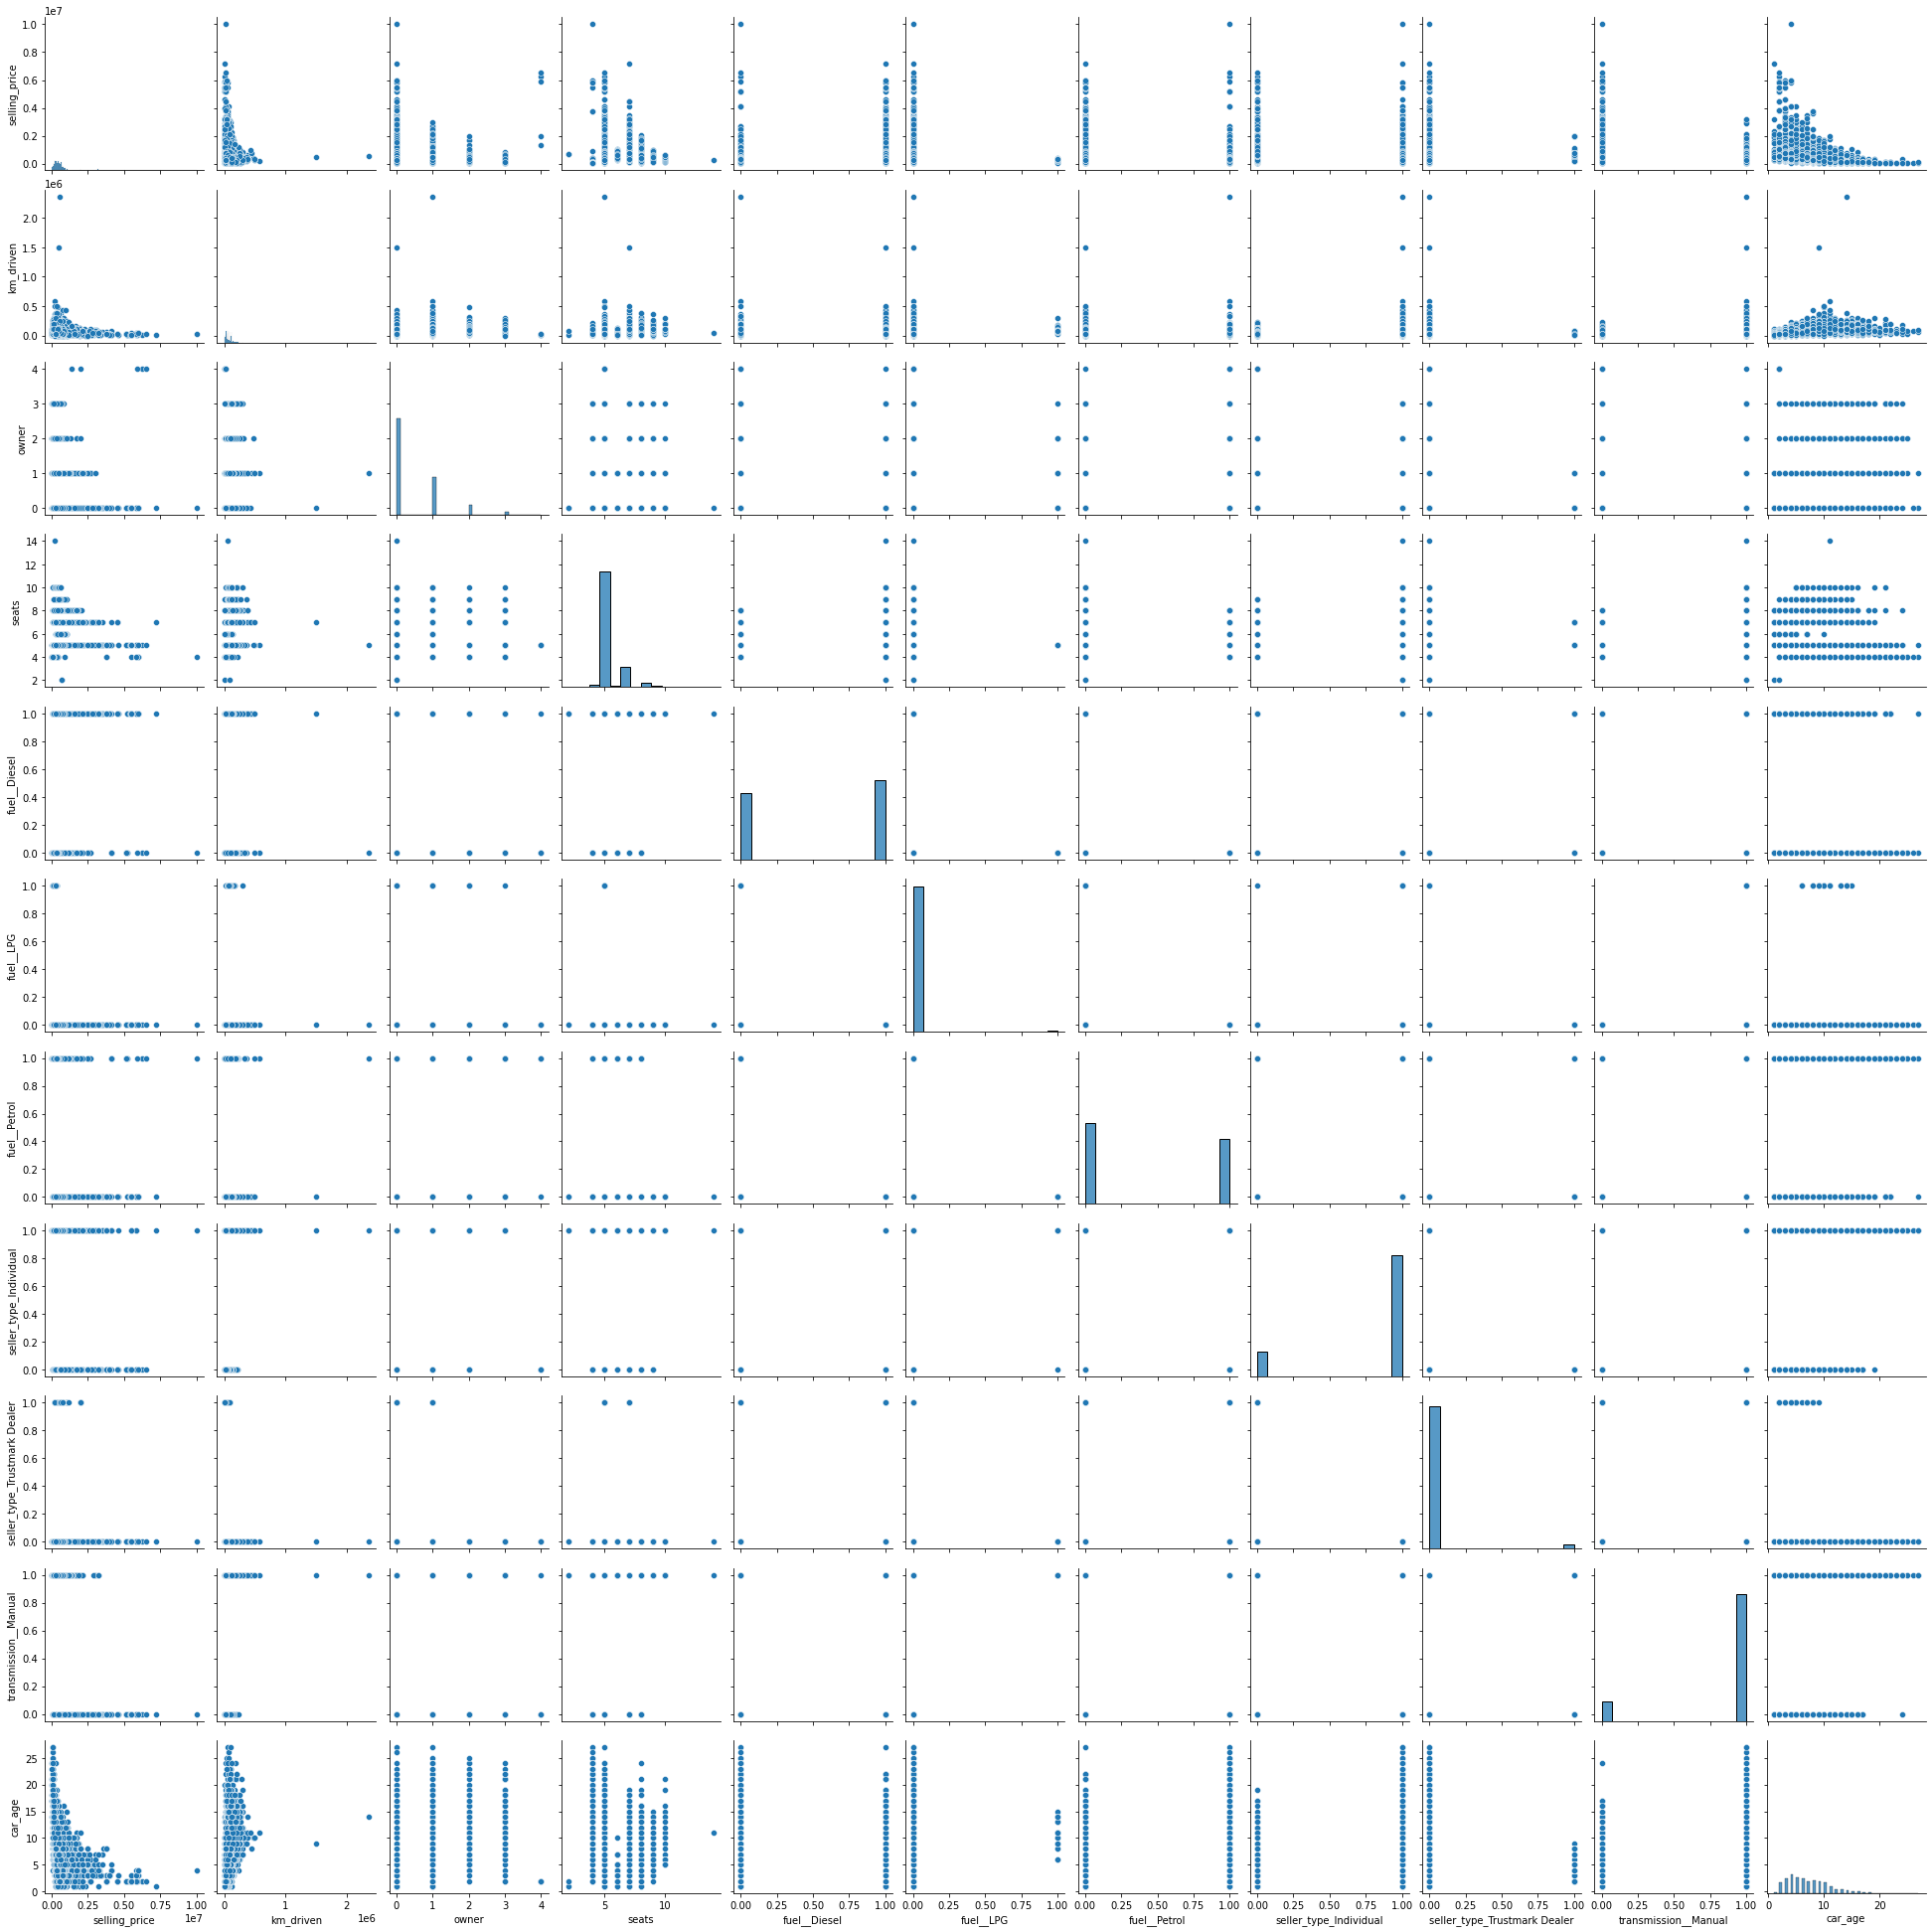

In [49]:
import seaborn as sns
sns.pairplot(data)

<IPython.core.display.Javascript object>

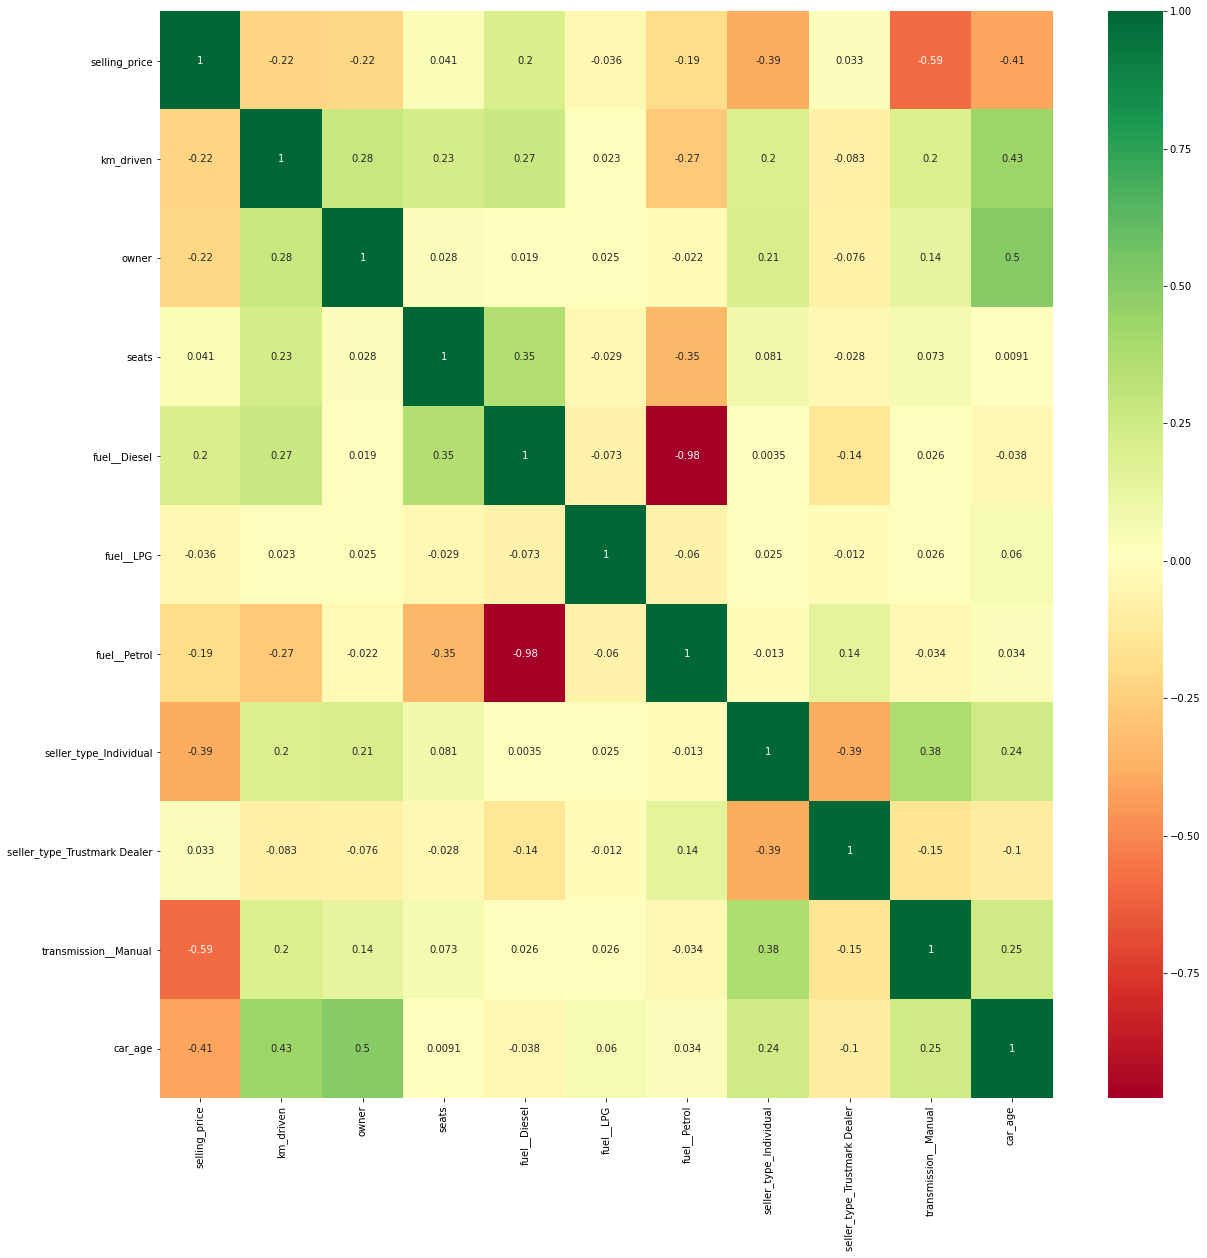

In [50]:
# get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# End of the EDA Part.....